In [1]:
# classe para representar pontos bidimensionais no espaço
class Ponto:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [3]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
import numpy as np

# Geração de dados
n = 100
a = np.random.random((n, 2))
b = np.random.random((n, 2))

# função que calcula par de pontos com menor distancia dados dois conjuntos diferentes
def menor_dist(a,b):
    # Construção da árvore KD
    tree = KDTree(a)

    # Consulta de vizinhos mais próximos
    (distances, neighbors) = tree.query(b, k=1)

    # Encontrando o índice do par mais próximo
    min_distance_index = np.argmin(distances)

    # Coordenadas do par mais próximo
    point_a = a[neighbors[min_distance_index]]
    point_b = b[min_distance_index]


    

    print(f"Ponto mais próximo em 'a': {point_a}")
    print(f"Ponto correspondente em 'b': {point_b}")


    # Encontrando os índices dos pontos mais próximos
    indices = neighbors.flatten()

    min_dist = distances.min()

    # Criação do gráfico
    plt.scatter(a[:, 0], a[:, 1], label='Conjunto A', c='blue')
    plt.scatter(b[:, 0], b[:, 1], label='Conjunto B', c='red')
    # Adiciona uma linha entre o par de pontos mais próximo
    plt.plot([point_a[0, 0], point_b[0]], [point_a[0, 1], point_b[1]], 'k--')

   

    plt.title('Pontos e Reta entre Pontos Mais Próximos')
    plt.xlabel('Eixo X')
    plt.ylabel('Eixo Y')
    plt.legend()
    plt.show()

    p1 = Ponto(point_a[0, 0], point_a[0,1])
    p2 = Ponto(point_b[0], point_b[1])
    
    return (p1, p2)

Ponto mais próximo em 'a': [[18.84701629 29.99778593]]
Ponto correspondente em 'b': [31.2795251  56.01074847]


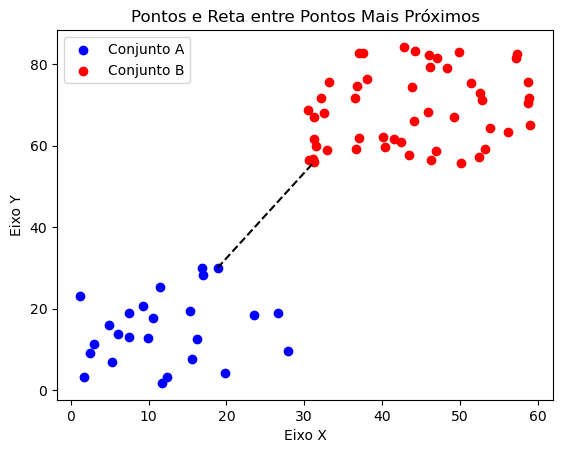

In [4]:

# simulação usando pontos aleatorios
# Geração de dois conjuntos de pontos separados
def generate_separated_sets(n, separation_distance):
    # Conjunto A: pontos gerados aleatoriamente
    set_a = np.random.rand(n//2, 2) * separation_distance

    # Conjunto B: pontos gerados aleatoriamente com uma distância de separação
    set_b = np.random.rand(n, 2) * separation_distance + np.array([separation_distance, 55])

    return set_a, set_b

# Parâmetros
n_pontos = 50
distancia_separacao = 30.0

# Geração dos conjuntos
conjunto_a, conjunto_b = generate_separated_sets(n_pontos, distancia_separacao)

# pega pontos com menor dist
p1, p2 = menor_dist(conjunto_a,conjunto_b)


In [5]:

# retorna inclinação e ponto onde reta perpendicular cruza o segmento formado por p1p2
def reta_perpendicular(p1, p2):
    inclinacao_original = (p1.y-p2.y)/(p1.x-p2.x)
    
    inclinacao_perpendicular = (-1.0)/inclinacao_original
    
    p = ((p1.x + p2.x)/2, (p1.y + p2.y)/2) # ponto da mediana
    print("mediana %d", p)
    
    b = p[1] - inclinacao_perpendicular * p[0]
    return (b, inclinacao_perpendicular)

# Função para calcular os valores y da reta dada inclinação
def reta(m, b, x):
    return m * x + b

mediana %d (25.06327069820426, 43.00426720375998)


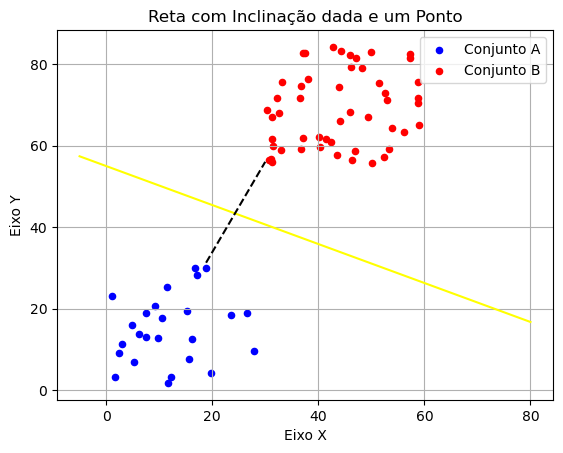

In [14]:
import numpy as np
import matplotlib.pyplot as plt

b, m = reta_perpendicular(p1,p2)

# Gerando valores x para a reta
x_valores = np.linspace(-5, 80, 100)

# Gerando valores y para a reta
y_valores = reta(m, b ,x_valores)

# Criação do gráfico
plt.plot(x_valores, y_valores, color='yellow')
#plt.scatter(ponto, color='red', label='Ponto na Reta')
  # Criação do gráfico
plt.scatter(conjunto_a[:, 0], conjunto_a[:, 1], label='Conjunto A', c='blue', s=20)
plt.scatter(conjunto_b[:, 0], conjunto_b[:, 1], label='Conjunto B', c='red', s=20)
# Adiciona uma linha entre o par de pontos mais próximo
plt.plot((p1.x,p1.y), (p2.x,p2.y), 'k--')

plt.title('Reta com Inclinação dada e um Ponto')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.grid(True)
plt.show()
